In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.decomposition import PCA

In [50]:
df=pd.read_csv("Desktop/titanic_train.csv")

In [51]:
print(df.shape)
df.head()

(850, 15)


,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


<AxesSubplot:>

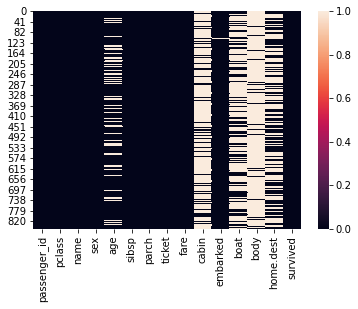

In [53]:
sns.heatmap(df.isnull())

In [54]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [55]:

def imputate_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age)==1:
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age

In [56]:

df["age"] = df[['age','pclass']].apply(imputate_age,axis=1)

In [57]:
df['fare'].value_counts()
df['fare'].fillna(df['fare'].mean(),inplace=True)

In [58]:
print(df['embarked'].value_counts())
df['embarked'].fillna('S',inplace=True)

S    589
C    176
Q     84
Name: embarked, dtype: int64


In [59]:
df.dropna(how='any',axis=1,inplace=True)

In [60]:
df.isnull().sum()

passenger_id    0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
embarked        0
survived        0
dtype: int64

<AxesSubplot:>

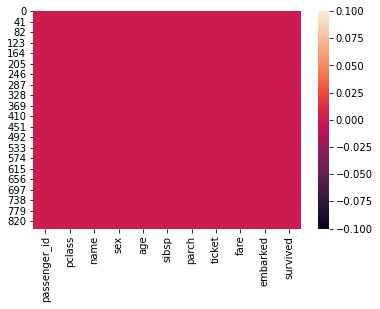

In [61]:
sns.heatmap(df.isnull())

In [62]:


df.dropna(how='any',axis=1,inplace=True)

<AxesSubplot:>

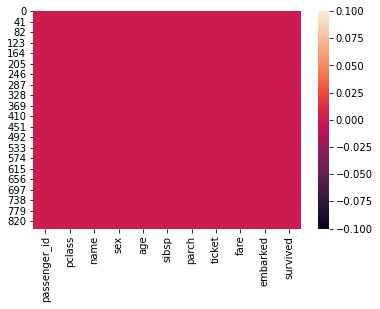

In [63]:
sns.heatmap(df.isnull())

In [64]:
df.isnull().sum()

passenger_id    0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
embarked        0
survived        0
dtype: int64

In [65]:
df['sibsp'].value_counts()

0    573
1    213
2     25
4     14
3     12
8      8
5      5
Name: sibsp, dtype: int64

In [66]:
df['parch'].value_counts()

0    651
1    113
2     72
4      5
5      3
3      3
9      2
6      1
Name: parch, dtype: int64

In [67]:
df['parch']=df['parch'].astype("category")
df['sibsp']=df['sibsp'].astype("category")
df['age']=df['age'].astype("int64")
df['embarked']=df['embarked'].astype("category")
df['sex']=df['sex'].astype('category')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   passenger_id  850 non-null    int64   
 1   pclass        850 non-null    int64   
 2   name          850 non-null    object  
 3   sex           850 non-null    category
 4   age           850 non-null    int64   
 5   sibsp         850 non-null    category
 6   parch         850 non-null    category
 7   ticket        850 non-null    object  
 8   fare          850 non-null    float64 
 9   embarked      850 non-null    category
 10  survived      850 non-null    int64   
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 50.9+ KB


In [69]:
df.describe()

,passenger_id,pclass,age,fare,survived
count,850.000000,850.00000,850.000000,850.000000,850.000000
mean,662.816471,2.32000,28.768235,34.012701,0.368235
std,380.751936,0.83853,13.224052,53.674141,0.482610
min,1.000000,1.00000,0.000000,0.000000,0.000000
25%,332.250000,2.00000,22.000000,7.895800,0.000000
50%,676.500000,3.00000,25.000000,14.108300,0.000000
75%,992.250000,3.00000,36.000000,31.000000,1.000000
max,1307.000000,3.00000,80.000000,512.329200,1.000000


C:\Users\278\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Out of 850 63 % people died in accident


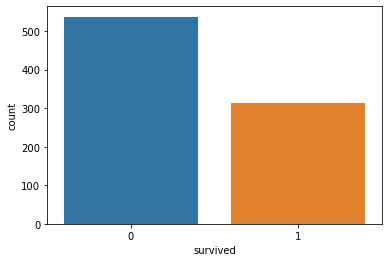

In [70]:
sns.countplot(df['survived'])
death_percent=round((df['survived'].value_counts().values[0]/850)*100)
print("Out of 850 {} % people died in accident".format(death_percent))

C:\Users\278\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3    56.0
1    24.0
2    20.0
Name: pclass, dtype: float64


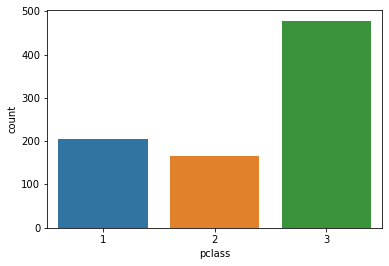

In [71]:
sns.countplot(df['pclass'])
pclass_percent=round((df['pclass'].value_counts()/850)*100)
print(pclass_percent)

male      64.823529
female    35.176471
Name: sex, dtype: float64


C:\Users\278\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

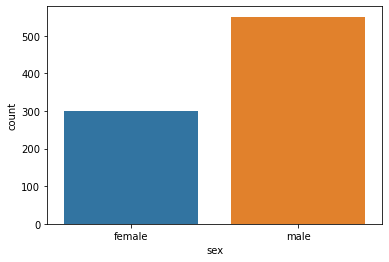

In [72]:
print((df["sex"].value_counts()/850)*100)
sns.countplot(df['sex'])

0    573
1    213
2     25
4     14
3     12
8      8
5      5
Name: sibsp, dtype: int64


C:\Users\278\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sibsp', ylabel='count'>

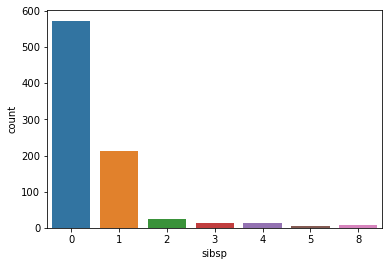

In [73]:
print(df['sibsp'].value_counts())
sns.countplot(df['sibsp'])

0    651
1    113
2     72
4      5
5      3
3      3
9      2
6      1
Name: parch, dtype: int64


C:\Users\278\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='parch', ylabel='count'>

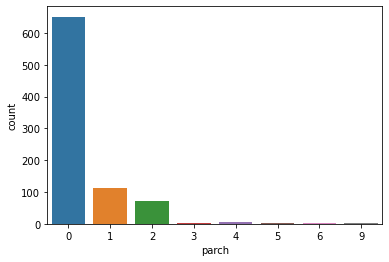

In [74]:
print(df['parch'].value_counts())
sns.countplot(df['parch'])

In [75]:
# C = Cherbourg; Q = Queenstown; S = Southampton

S    590
C    176
Q     84
Name: embarked, dtype: int64


C:\Users\278\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='embarked', ylabel='count'>

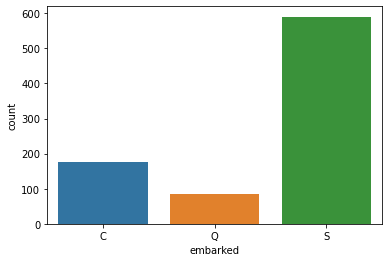

In [76]:
print(df['embarked'].value_counts())
sns.countplot(df['embarked'])

C:\Users\278\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.6404286462992034
0.8651352466007038


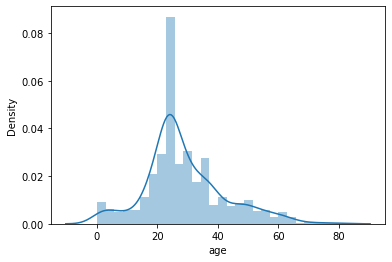

In [77]:
sns.distplot(df["age"])
print(df["age"].skew())
print(df["age"].kurt())

In [78]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,24,0,0,335432,7.7333,Q,1
1,699,3,"Cacic, Mr. Luka",male,38,0,0,315089,8.6625,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30,1,1,345773,24.1500,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54,1,3,29105,23.0000,S,1
4,576,2,"Veal, Mr. James",male,40,0,0,28221,13.0000,S,0


In [81]:
X = df.drop(['passenger_id', 'survived','name', 'ticket','embarked'],axis=1)
y = df['survived']

In [89]:
X['sex'] = pd.get_dummies(X['sex']).values
X.head()

,pclass,sex,age,sibsp,parch,fare
0,3,1,24,0,0,7.7333
1,3,1,38,0,0,8.6625
2,3,1,30,1,1,24.1500
3,2,1,54,1,3,23.0000
4,2,1,40,0,0,13.0000


In [87]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: survived, dtype: int64

In [90]:
scaler=StandardScaler()
x_transform=scaler.fit_transform(X)

In [93]:
x_transform[0]

array([ 0.8114201 ,  0.03431991, -0.36078523, -0.46996259, -0.43498945,
       -0.48989835])

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 355)

In [99]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(595, 6)
(595,)
(255, 6)
(255,)


In [96]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_test,y_test)

0.6392156862745098

In [98]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
log_reg.score(x_test,y_test)

0.6823529411764706

In [102]:
y_pred=dtc.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [106]:
Accuracy_score=accuracy_score(y_test,y_pred)
Accuracy_score

0.6392156862745098

In [107]:
Conf_m=confusion_matrix(y_test,y_pred)
Conf_m

array([[116,  35],
       [ 57,  47]], dtype=int64)

In [109]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       173
           1       0.45      0.57      0.51        82

    accuracy                           0.64       255
   macro avg       0.61      0.62      0.61       255
weighted avg       0.67      0.64      0.65       255



 # Before Hypertunning

In [112]:
scaler=StandardScaler()
X_transform=scaler.fit_transform(X)

In [113]:
x_train,x_test,y_train,y_test=train_test_split(X_transform,y,random_state=102,test_size=.30)

In [115]:
pca=PCA()

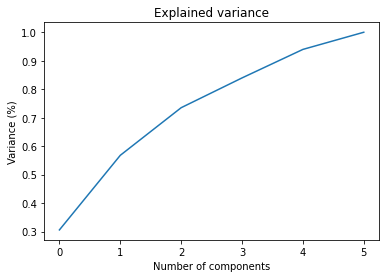

In [120]:
principl_component=pca.fit_transform(X_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Variance (%)")
plt.title("Explained variance")
plt.show()

In [121]:
pca=PCA(n_components=5)
new_data=pca.fit_transform(X_transform)
principal=pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5'])
principal

,PC-1,PC-2,PC-3,PC-4,PC-5
0,-1.013959,-0.525402,0.143734,0.148836,0.112144
1,-0.501033,-0.879695,-0.019869,-0.643221,0.168221
2,-0.537220,0.680591,-0.242510,-0.571102,0.329384
3,1.299662,1.419731,-0.738872,-2.192949,1.915503
4,0.392258,-0.987947,-0.005170,-0.505061,0.024845
...,...,...,...,...,...
845,2.107873,-1.271516,-0.141122,-0.833824,-0.094372
846,1.994719,-1.446496,-0.176996,-1.176672,-0.064363
847,-0.064905,0.046482,-0.007555,0.231473,-0.661958
848,-1.619832,1.322395,0.072667,0.883950,0.228768


In [122]:
x_train,x_test,y_train,y_test=train_test_split(principal,y,test_size=.30,random_state=212)

In [123]:
dtc=DecisionTreeClassifier()

In [124]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [125]:
dtc.score(x_test,y_test)

0.6745098039215687

In [128]:
grid_param={
    'criterion':['ginni','entropy'],
    'max_depth':range(1,32,2),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

In [129]:
grid_search=GridSearchCV(estimator=dtc,
                        param_grid=grid_param,
                        cv=5,
                        n_jobs=-1)

In [130]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(1, 32, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [132]:
best_parameters=grid_search.best_params_
print(best_parameters)
grid_search.best_score_

{'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 5, 'min_samples_split': 3, 'splitter': 'random'}


0.7243697478991595

In [180]:
# Applying best parameter in decision tree
dtc2=DecisionTreeClassifier(criterion= 'entropy', max_depth= 250, min_samples_leaf= 5, min_samples_split= 3, splitter= 'random')
dtc2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=250, min_samples_leaf=5,
                       min_samples_split=3, splitter='random')

In [181]:
dtc2.score(x_test,y_test)

0.7098039215686275